In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (mean_squared_error, accuracy_score,
                            precision_score, recall_score, f1_score,
                            confusion_matrix, r2_score, mean_absolute_error)
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Task 1**

In [ ]:
# Read and display data

cancer_column_names = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean",
    "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se",
    "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]
df_breast_cancer = pd.read_csv('/content/drive/MyDrive/COMP 551 Fall 2025 A1/breast_cancer_wisconsin_diagnostic/wdbc.data', header=None, names=cancer_column_names)
df_parkinsons_ = pd.read_csv('/content/drive/MyDrive/COMP 551 Fall 2025 A1/parkinsons_telemonitoring/parkinsons_updrs.data')
print("Breast Cancer Dataset")
display(df_breast_cancer)

num_M = df_breast_cancer[df_breast_cancer['Diagnosis'] == 'M'].shape[0]
num_B = df_breast_cancer[df_breast_cancer['Diagnosis'] == 'B'].shape[0]
print(f"Number of Malignant Cases: {num_M}")
print(f"Number of Benign Cases: {num_B}")


Breast Cancer Dataset


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Number of Malignant Cases: 212
Number of Benign Cases: 357


In [ ]:
print("Parkinsons Dataset")
display(df_parkinsons_)

Parkinsons Dataset


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
# Column description of parkinson dataset
# subject - Integer that uniquely identifies each subject
# age - Subject age
# sex - Subject gender '0' - male, '1' - female
# test_time - Time since recruitment into the trial. The integer part is the
# number of days since recruitment.
# motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
# total_UPDRS - Clinician's total UPDRS score, linearly interpolated
# Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of
# variation in fundamental frequency
# Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA -
# Several measures of variation in amplitude
# NHR,HNR - Two measures of ratio of noise to tonal components in the voice
# RPDE - A nonlinear dynamical complexity measure
# DFA - Signal fractal scaling exponent
# PPE - A nonlinear measure of fundamental frequency variation

In [ ]:
# Get data types by column for cancer dataset
# Diagnosis is an object, needs to be encoded to binary values {0,1}
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Get number of null values by col and total amount for cancer dataset
# No empty values found

print(f"Cancer Dataset: Number of empty values by column\n{df_breast_cancer.isnull().sum()}")
print(f"Cancer Dataset: Total Number of empty values = {df_breast_cancer.isnull().sum().sum()}")


Cancer Dataset: Number of empty values by column
ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Cancer Dat

In [ ]:
# Get data types by column for parkinsons dataset
# All cols are floats, no binary mappings needed
df_parkinsons_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
# Get number of null values for parkinsons dataset by col and total amount

print(f"Parkinsons Dataset: Number of empty values by column\n{df_parkinsons_.isnull().sum()}")
print(f"Parkinsons Dataset: Total Number of empty values = {df_parkinsons_.isnull().sum().sum()}")

Parkinsons Dataset: Number of empty values by column
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64
Parkinsons Dataset: Total Number of empty values = 0


In [ ]:
# Get statistics for cancer dataset
df_breast_cancer.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Get statistics for parkinsons dataset
df_parkinsons_.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:
# Get count of duplicated rows in cancer dataset, there are none
df_breast_cancer.duplicated().sum()

np.int64(0)

In [ ]:
# Get count of duplicated rows in parkinsons dataset, there are none
df_parkinsons_.duplicated().sum()

np.int64(0)

In [ ]:
# Binary mapping for diagnosis col, remove identifier columns from both datasets
df_breast_cancer['Diagnosis'] = df_breast_cancer['Diagnosis'].map({'M': 1, 'B': 0})
df_breast_cancer = df_breast_cancer.drop('ID', axis=1)
df_parkinsons_ = df_parkinsons_.drop('subject#', axis=1)



In [ ]:
# Negative values exist in test_time col of parkinsons dataset
print(df_parkinsons_['test_time'].nsmallest(3))

5725   -4.2625
5750   -4.2625
5775   -4.2618
Name: test_time, dtype: float64


In [ ]:
# Remove negative values
negative_indexes_test_time = df_parkinsons_[df_parkinsons_['test_time'] < 0].index
df_parkinsons_ = df_parkinsons_.drop(index=negative_indexes_test_time)
print(df_parkinsons_['test_time'].nsmallest(3))

5726    0.39583
5751    0.39653
5776    0.39653
Name: test_time, dtype: float64


In [ ]:
# Scale all numeric columns of cancer dataset
from sklearn.preprocessing import MinMaxScaler
numeric_cancer_cols = df_breast_cancer.select_dtypes(include="number").columns
numeric_cancer_cols = numeric_cancer_cols.drop("Diagnosis")
scaler = MinMaxScaler()
df_breast_cancer[numeric_cancer_cols] = scaler.fit_transform(df_breast_cancer[numeric_cancer_cols])
display(df_breast_cancer)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [ ]:
# Scale all numeric columns of parkinsons dataset
numeric_parkinsons_cols = df_parkinsons_.select_dtypes(include="number").columns
df_parkinsons_[numeric_parkinsons_cols] = scaler.fit_transform(df_parkinsons_[numeric_parkinsons_cols])
display(df_parkinsons_)

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.734694,0.0,0.024395,0.671862,0.570887,0.058390,0.071164,0.064324,0.039635,0.064433,...,0.098030,0.079287,0.067543,0.051764,0.079267,0.018723,0.551717,0.328638,0.097793,0.194544
1,0.734694,0.0,0.057046,0.679056,0.581222,0.021884,0.032819,0.017305,0.015478,0.017303,...,0.073522,0.051720,0.053186,0.052753,0.051699,0.014474,0.704771,0.348330,0.144300,0.121335
2,0.734694,0.0,0.089659,0.686250,0.591536,0.040137,0.050458,0.030065,0.023868,0.030178,...,0.074483,0.035577,0.039375,0.044291,0.035556,0.026651,0.590568,0.381812,0.085362,0.265104
3,0.734694,0.0,0.117396,0.692342,0.600308,0.044877,0.054856,0.027618,0.031969,0.027673,...,0.144642,0.058674,0.064878,0.062791,0.058632,0.036834,0.629169,0.412583,0.181761,0.437884
4,0.734694,0.0,0.154566,0.700522,0.612081,0.025413,0.040353,0.010488,0.012585,0.010486,...,0.072081,0.032162,0.044524,0.057515,0.032121,0.015160,0.675585,0.393664,0.134202,0.241814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,0.510204,0.0,0.662009,0.506111,0.551863,0.032574,0.065142,0.023422,0.018082,0.023420,...,0.064392,0.050416,0.056882,0.047624,0.050416,0.033224,0.571847,0.602569,0.111219,0.270078
5871,0.510204,0.0,0.694785,0.491694,0.541507,0.021581,0.050616,0.015032,0.015044,0.015147,...,0.090822,0.055321,0.065605,0.060629,0.055321,0.015563,0.586122,0.460040,0.145466,0.146851
5872,0.510204,0.0,0.727236,0.477393,0.531234,0.026825,0.050638,0.020801,0.020830,0.020856,...,0.104757,0.075127,0.076448,0.059640,0.075086,0.023283,0.646289,0.401075,0.184435,0.168492
5873,0.510204,0.0,0.759361,0.463237,0.521066,0.019968,0.040804,0.016605,0.015623,0.016604,...,0.050457,0.033031,0.040950,0.038759,0.032990,0.010292,0.628534,0.512392,0.140033,0.169155


In [ ]:
# Compute statistics again with pre-processing improvements for cancer dataset
df_breast_cancer.describe()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Compute statistics again with pre-processing improvements for parkinsons dataset
df_parkinsons_.describe()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,...,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,0.588057,0.318438,0.430815,0.471436,0.458703,0.053706,0.094241,0.046463,0.041198,0.046517,...,0.136959,0.096527,0.110304,0.091581,0.096506,0.042568,0.552809,0.478986,0.395985,0.278459
std,0.180158,0.465910,0.247896,0.235934,0.223161,0.056756,0.081205,0.054641,0.054021,0.054634,...,0.110673,0.082185,0.100995,0.073275,0.082185,0.079863,0.118526,0.123947,0.201830,0.128911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448980,0.000000,0.218228,0.288986,0.299258,0.027733,0.045507,0.021849,0.020179,0.021847,...,0.071600,0.047622,0.053610,0.048247,0.047581,0.014261,0.489977,0.390983,0.233417,0.189366
50%,0.591837,0.000000,0.424736,0.459292,0.427613,0.041045,0.072811,0.033561,0.029799,0.033615,...,0.109082,0.075065,0.084807,0.074074,0.075065,0.024282,0.559366,0.480001,0.368387,0.258651
75%,0.734694,1.000000,0.641878,0.654312,0.612613,0.060206,0.115239,0.051739,0.043975,0.051850,...,0.162902,0.117937,0.132269,0.110763,0.117896,0.041683,0.629183,0.568087,0.561611,0.341822
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Task 2

In [ ]:
#Helpers

def add_bias(x):
  return np.column_stack([x, np.ones(x.shape[0])])

def prepare_bias(x, can_add_bias_=True):
  if x.ndim == 1:
      x = x[:, None]
  if can_add_bias_:
      x = add_bias(x)
  return x

def logistic(z):
  return 1.0 / (1.0 + np.exp(-z))

In [ ]:
# Linear Regression

class LinearRegression:
  def __init__ (self, add_bias=True):
    self.add_bias = add_bias
    pass

  def fit(self, x, y):
    x = prepare_bias(x, self.add_bias)
    self.w = np.linalg.lstsq(x, y)[0]
    return self

  def predict(self, x):
    x = prepare_bias(x, self.add_bias)
    return x@self.w

  def gradient_linear(self, x, y):
    x = prepare_bias(x, self.add_bias)
    N = x.shape[0]
    yh = np.dot(self.w, x)
    grad = np.dot(x.T, yh - y) / N
    return grad

  def sgd_linear(self, x, y, learning_rate=0.001, max_iters=1e4, batch_size=8):
    x = prepare_bias(x, self.add_bias)
    N, D = x.shape
    rand = np.random.default_rng(0)  #could define a seed in function

    for i in range(max_iters):
      index = rand.choice(N, size=batch_size, replace=False, shuffle=True)
      xbatch, ybatch = x[index], y[index]
      err = xbatch @ self.w - ybatch
      grad = (xbatch.T @ err) / xbatch.shape[0]
      self.w -= learning_rate * grad

    return self



In [ ]:
# Logistic Regression

class LogisticRegression:
  def __init__(self, add_bias=True, learning_rate=0.1, epsilon=1e-4, max_iters=1e5, verbose=False):
    self.add_bias = add_bias
    self.learning_rate = learning_rate
    self.epsilon = epsilon
    self.max_iters = max_iters
    self.verbose = verbose

  def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))
    grad = np.dot(x.T, yh - y) / N
    return grad

  def fit(self, x, y):
    x = prepare_bias(x, self.add_bias)
    N, D = x.shape
    self.w = np.zeros(D)
    g = np.inf
    t = 0

    #Gradient Descent
    while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
      g = self.gradient(x, y)
      self.w -= self.learning_rate*g
      t += 1

    if self.verbose:
      print(f"terminated after {t} iterations, with ||gradient|| = {np.linalg.norm(g)}")
      print(f"the weight found: {self.w}")
      return self

  def predict(self, x):
    x = prepare_bias(x, self.add_bias)
    yh = logistic(np.dot(x, self.w))
    return yh

  def gradient_logistic(self, x, y):
    x = prepare_bias(x, self.add_bias)
    N = x.shape[0]
    yh = logistic(np.dot(x, self.w))
    grad = np.dot(x.T, yh - y) / N
    return grad

  def sgd_logistic(self, x, y, learning_rate=0.001, max_iters=1000, batch_size=8):
    x = prepare_bias(x, self.add_bias)
    N, D = x.shape
    rand = np.random.default_rng(0)  #could define a seed in function

    for i in range(max_iters):
      index = rand.choice(N, size=batch_size, replace=False, shuffle=True)
      xbatch, ybatch = x[index], y[index]
      p = logistic(xbatch@self.w)
      grad = (xbatch.T@(p-batch)) / xbatch.shape[0]
      self.w -= learning_rate * grad

    return self



# Task 3

## Task 3 1


In [ ]:
from sklearn.model_selection import train_test_split
import random
seed = 42

# Set seed for testing reproducability

np.random.seed(seed)
random.seed(seed)

X_cancer = df_breast_cancer.drop('Diagnosis', axis=1)
y_cancer = df_breast_cancer['Diagnosis']
x_parkinsons = df_parkinsons_.drop('total_UPDRS', axis=1)
y_parkinsons = df_parkinsons_['total_UPDRS']
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=seed)
X_train_parkinsons, X_test_parkinsons, y_train_parkinsons, y_test_parkinsons = train_test_split(x_parkinsons, y_parkinsons, test_size=0.2, random_state=seed)
LinearRegressionModel = LinearRegression()

In [ ]:
LinearRegressionModel.fit(X_train_parkinsons, y_train_parkinsons)
y_pred_parkinsons = LinearRegressionModel.predict(X_test_parkinsons)
print(f"MSE Linear Regression Test Parkinsons Dataset: {mean_squared_error(y_test_parkinsons, y_pred_parkinsons): .2%}")

MSE Linear Regression Test Parkinsons Dataset:  0.42%


In [ ]:
# Perform testing of parksinsons train set
y_pred__train_parkinsons = LinearRegressionModel.predict(X_train_parkinsons)
print(f"MSE Linear Regression Train Parkinsons Dataset: {mean_squared_error(y_train_parkinsons, y_pred__train_parkinsons): .2%}")

MSE Linear Regression Train Parkinsons Dataset:  0.47%


In [ ]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train_cancer, y_train_cancer)
y_pred_cancer_logistic = LogisticRegressionModel.predict(X_test_cancer)
y_pred_cancer_logistic_class = (y_pred_cancer_logistic > 0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score_pred_cancer_test = accuracy_score(y_test_cancer, y_pred_cancer_logistic_class)
print(f"Accuracy Score Logistic Regression Test Cancer Dataset: {accuracy_score_pred_cancer_test: .2%}")


Accuracy Score Logistic Regression Test Cancer Dataset:  97.37%


## Additional Experiment

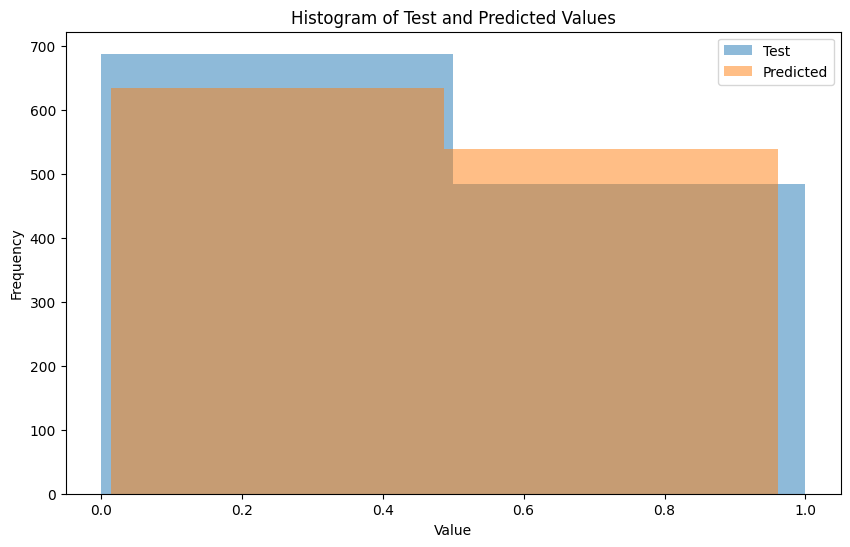

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(y_test_parkinsons, bins=2, alpha=0.5, linewidth=2, label='Test')
plt.hist(y_pred_parkinsons, bins=2, alpha=0.5, linewidth=2, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Test and Predicted Values')
plt.legend()
plt.show()


In [ ]:
y_pred_cancer_train_logistic = LogisticRegressionModel.predict(X_train_cancer)
y_pred_cancer_train_logistic_class = (y_pred_cancer_train_logistic > 0.5).astype(int)
accuracy_score_pred_cancer_train = accuracy_score(y_train_cancer, y_pred_cancer_train_logistic_class)
print(f"Accuracy Score Logistic Regression Train Cancer Dataset: {accuracy_score_pred_cancer_train: .2%}")

Accuracy Score Logistic Regression Train Cancer Dataset:  98.68%


##Task 3.2

In [ ]:
LinearRegressionModel.fit(X_train_parkinsons, y_train_parkinsons)
print("Parkinsons Dataset Linear Regression Model Weights coefficients:\n" + str(LinearRegressionModel.w))

Parkinsons Dataset Linear Regression Model Weights coefficients:
[ 6.41349284e-02 -2.91539884e-02  1.13319323e-02  8.80136035e-01
 -6.12495104e-01  1.19985622e-01  3.03352294e+00 -5.73107390e-03
 -2.47655270e+00 -1.68885438e-01 -3.38697250e-02 -1.84174643e+01
  3.23548093e-01 -2.02467185e-01  1.83610065e+01 -3.34492888e-02
 -7.63353543e-02  5.48135197e-02 -2.20491257e-02 -5.17035212e-02
  6.08228773e-02]


In [ ]:
print("Cancer Dataset Logistic Regression Model Weights coefficiens: \n" + str(LogisticRegressionModel.w))

Cancer Dataset Logistic Regression Model Weights coefficiens: 
[  1.2563641    3.70946015   1.1555745    2.951096     0.1207988
  -3.27664242   5.49760728   8.05025725  -1.21446729  -3.1661957
   9.78254665  -0.42619741   6.52722539   5.64476701   2.02078969
  -5.54497754  -1.43808885   0.57421331  -2.95015587  -3.46018383
   6.15684916   7.17663855   4.3699066    5.75695436   4.07050055
   0.15277266   4.99711317   4.70892212   7.48620982   0.85706741
 -17.92031052]


**NEEDS TO BE DONE IN REPORT: discuss how each feature could affect the
performance of the models.**

## Task 3.3

In [ ]:
# Train model with different training set sizes and return performance metrics

def train_with_subset_sizes(model_class, X_train, y_train, X_test, y_test,
                           subset_percentages, n_runs=5, is_classification=False, **model_params):
    train_scores_mean = []
    train_scores_std = []
    test_scores_mean = []
    test_scores_std = []

    n_total = len(X_train)

    for pct in subset_percentages:
        n_samples = int(n_total * pct / 100)
        train_scores_run = []
        test_scores_run = []

        for run in range(n_runs):
            np.random.seed(seed + run)
            indices = np.random.choice(n_total, n_samples, replace=False)
            X_subset = X_train.iloc[indices] if hasattr(X_train, 'iloc') else X_train[indices]
            y_subset = y_train.iloc[indices] if hasattr(y_train, 'iloc') else y_train[indices]

            # train model
            model = model_class(**model_params)
            model.fit(X_subset, y_subset)

            # predictions
            y_train_pred = model.predict(X_subset)
            y_test_pred = model.predict(X_test)

            if is_classification:
                # Convert to binary predictions for classification
                y_train_pred_class = (y_train_pred > 0.5).astype(int)
                y_test_pred_class = (y_test_pred > 0.5).astype(int)
                train_score = accuracy_score(y_subset, y_train_pred_class)
                test_score = accuracy_score(y_test, y_test_pred_class)
            else:
                # MSE for regression
                train_score = mean_squared_error(y_subset, y_train_pred)
                test_score = mean_squared_error(y_test, y_test_pred)

            train_scores_run.append(train_score)
            test_scores_run.append(test_score)

        train_scores_mean.append(np.mean(train_scores_run))
        train_scores_std.append(np.std(train_scores_run))
        test_scores_mean.append(np.mean(test_scores_run))
        test_scores_std.append(np.std(test_scores_run))

    return train_scores_mean, train_scores_std, test_scores_mean, test_scores_std

In [ ]:
print("Task 3.3: Training Set Size Analysis")
print("=" * 50)

subset_percentages = [20, 30, 40, 50, 60, 70, 80]

# Linear regression on Parkinsons

print("Linear Regression on Parkinsons Dataset:")
lr_train_mean, lr_train_std, lr_test_mean, lr_test_std = train_with_subset_sizes(
    LinearRegression, X_train_parkinsons, y_train_parkinsons, X_test_parkinsons, y_test_parkinsons,
    subset_percentages, n_runs=5
)

for i, pct in enumerate(subset_percentages):
    print(f"  {pct}%: Train MSE = {lr_train_mean[i]:.4f} ± {lr_train_std[i]:.4f}, "
          f"Test MSE = {lr_test_mean[i]:.4f} ± {lr_test_std[i]:.4f}")

# Logistic regression on Cancer

print("\nLogistic Regression on Cancer Dataset:")
log_train_mean, log_train_std, log_test_mean, log_test_std = train_with_subset_sizes(
    LogisticRegression, X_train_cancer, y_train_cancer,
    X_test_cancer, y_test_cancer, subset_percentages, n_runs=5, is_classification=True
)

for i, pct in enumerate(subset_percentages):
    print(f"  {pct}%: Train Acc = {log_train_mean[i]:.4f} ± {log_train_std[i]:.4f}, "
          f"Test Acc = {log_test_mean[i]:.4f} ± {log_test_std[i]:.4f}")


Task 3.3: Training Set Size Analysis
Linear Regression on Parkinsons Dataset:
  20%: Train MSE = 0.0046 ± 0.0002, Test MSE = 0.0043 ± 0.0001
  30%: Train MSE = 0.0046 ± 0.0001, Test MSE = 0.0043 ± 0.0000
  40%: Train MSE = 0.0046 ± 0.0001, Test MSE = 0.0042 ± 0.0000
  50%: Train MSE = 0.0046 ± 0.0001, Test MSE = 0.0042 ± 0.0000
  60%: Train MSE = 0.0046 ± 0.0001, Test MSE = 0.0042 ± 0.0000
  70%: Train MSE = 0.0046 ± 0.0000, Test MSE = 0.0042 ± 0.0000
  80%: Train MSE = 0.0047 ± 0.0001, Test MSE = 0.0042 ± 0.0000

Logistic Regression on Cancer Dataset:
  20%: Train Acc = 0.9934 ± 0.0088, Test Acc = 0.9614 ± 0.0163
  30%: Train Acc = 0.9868 ± 0.0086, Test Acc = 0.9702 ± 0.0070
  40%: Train Acc = 0.9868 ± 0.0082, Test Acc = 0.9772 ± 0.0043
  50%: Train Acc = 0.9903 ± 0.0070, Test Acc = 0.9754 ± 0.0035
  60%: Train Acc = 0.9905 ± 0.0064, Test Acc = 0.9754 ± 0.0035
  70%: Train Acc = 0.9893 ± 0.0043, Test Acc = 0.9754 ± 0.0035
  80%: Train Acc = 0.9868 ± 0.0021, Test Acc = 0.9737 ± 0.0000


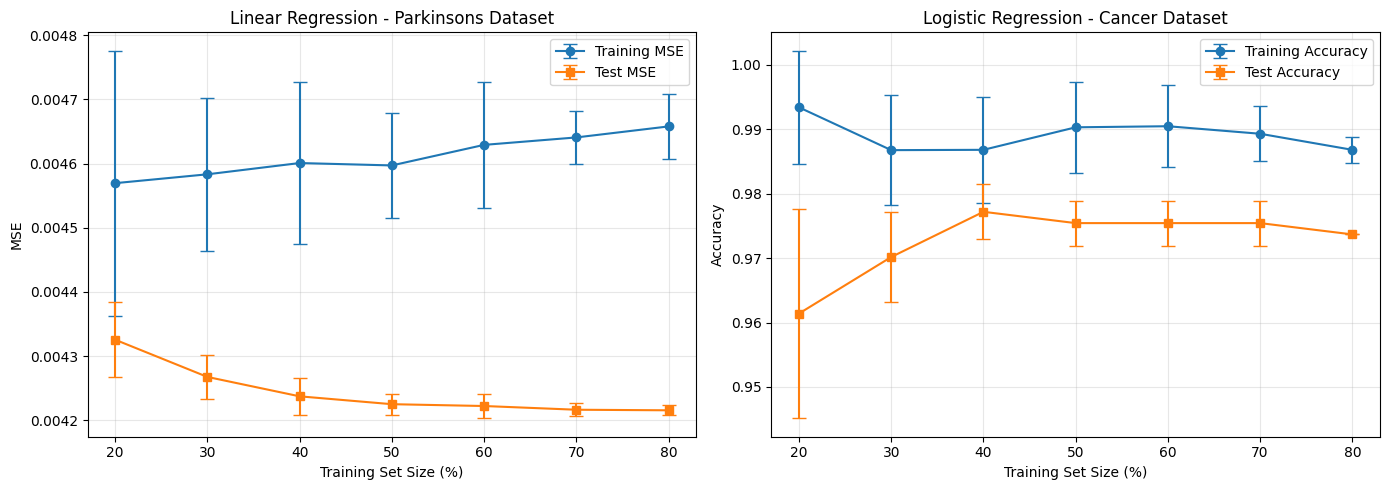

In [ ]:
# Plotting results

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression plot
ax1.errorbar(subset_percentages, lr_train_mean, yerr=lr_train_std,
            label='Training MSE', marker='o', capsize=5)
ax1.errorbar(subset_percentages, lr_test_mean, yerr=lr_test_std,
            label='Test MSE', marker='s', capsize=5)
ax1.set_xlabel('Training Set Size (%)')
ax1.set_ylabel('MSE')
ax1.set_title('Linear Regression - Parkinsons Dataset')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Logistic Regression plot
ax2.errorbar(subset_percentages, log_train_mean, yerr=log_train_std,
            label='Training Accuracy', marker='o', capsize=5)
ax2.errorbar(subset_percentages, log_test_mean, yerr=log_test_std,
            label='Test Accuracy', marker='s', capsize=5)
ax2.set_xlabel('Training Set Size (%)')
ax2.set_ylabel('Accuracy')
ax2.set_title('Logistic Regression - Cancer Dataset')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Task 3.4

In [ ]:
#  Mini-batch Size Analysis

# Update LinearRegression class with SGD
class LinearRegressionSGD(LinearRegression):
    def __init__(self, add_bias=True):
        super().__init__(add_bias)

    def fit_sgd(self, x, y, learning_rate=0.01, max_iters=1000, batch_size=32):
        x = prepare_bias(x, self.add_bias)
        N, D = x.shape
        self.w = np.zeros(D)
        rand = np.random.default_rng(seed)

        for i in range(max_iters):
            indices = rand.choice(N, size=min(batch_size, N), replace=False)
            xbatch = x.iloc[indices] if hasattr(x, 'iloc') else x[indices]
            ybatch = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

            err = xbatch @ self.w - ybatch
            grad = (xbatch.T @ err) / xbatch.shape[0]
            self.w -= learning_rate * grad
        return self

# Update LogisticRegression class with SGD
class LogisticRegressionSGD(LogisticRegression):
    def __init__(self, add_bias=True):
        super().__init__(add_bias)

    def fit_sgd(self, x, y, learning_rate=0.1, max_iters=1000, batch_size=32):
        x = prepare_bias(x, self.add_bias)
        N, D = x.shape
        self.w = np.zeros(D)
        rand = np.random.default_rng(seed)

        for i in range(max_iters):
            indices = rand.choice(N, size=min(batch_size, N), replace=False)
            xbatch = x.iloc[indices] if hasattr(x, 'iloc') else x[indices]
            ybatch = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

            p = logistic(xbatch @ self.w)
            grad = (xbatch.T @ (p - ybatch)) / xbatch.shape[0]
            self.w -= learning_rate * grad
        return self

In [ ]:
# Execute batch size experiments

batch_sizes = [8, 16, 32, 64, 128]
lr_batch_results = []
log_batch_results = []

print("\nLinear Regression - Batch Size Analysis:")
for batch_size in batch_sizes:
    model = LinearRegressionSGD()
    model.fit_sgd(X_train_parkinsons, y_train_parkinsons, batch_size=batch_size)
    y_pred = model.predict(X_test_parkinsons)
    mse = mean_squared_error(y_test_parkinsons, y_pred)
    lr_batch_results.append(mse)
    print(f"  Batch size {batch_size}: MSE = {mse:.4f}")

# add fully batched baseline
model_full = LinearRegression()
model_full.fit(X_train_parkinsons, y_train_parkinsons)
y_pred_full = model_full.predict(X_test_parkinsons)
mse_full = mean_squared_error(y_test_parkinsons, y_pred_full)
print(f"  Fully batched (analytical): MSE = {mse_full:.4f}")

print("\nLogistic Regression - Batch Size Analysis:")
for batch_size in batch_sizes:
    model = LogisticRegressionSGD()
    model.fit_sgd(X_train_cancer, y_train_cancer, batch_size=batch_size)
    y_pred = model.predict(X_test_cancer)
    y_pred_class = (y_pred > 0.5).astype(int)
    acc = accuracy_score(y_test_cancer, y_pred_class)
    log_batch_results.append(acc)
    print(f"  Batch size {batch_size}: Accuracy = {acc:.4f}")

# add fully batched baseline
model_full = LogisticRegression()
model_full.fit(X_train_cancer, y_train_cancer)
y_pred_full = model_full.predict(X_test_cancer)
y_pred_full_class = (y_pred_full > 0.5).astype(int)
acc_full = accuracy_score(y_test_cancer, y_pred_full_class)
print(f"  Fully batched (gradient descent): Accuracy = {acc_full:.4f}")


Linear Regression - Batch Size Analysis:
  Batch size 8: MSE = 0.0164
  Batch size 16: MSE = 0.0169
  Batch size 32: MSE = 0.0167
  Batch size 64: MSE = 0.0167
  Batch size 128: MSE = 0.0167
  Fully batched (analytical): MSE = 0.0042

Logistic Regression - Batch Size Analysis:
  Batch size 8: Accuracy = 0.9561
  Batch size 16: Accuracy = 0.9649
  Batch size 32: Accuracy = 0.9561
  Batch size 64: Accuracy = 0.9561
  Batch size 128: Accuracy = 0.9561
  Fully batched (gradient descent): Accuracy = 0.9737


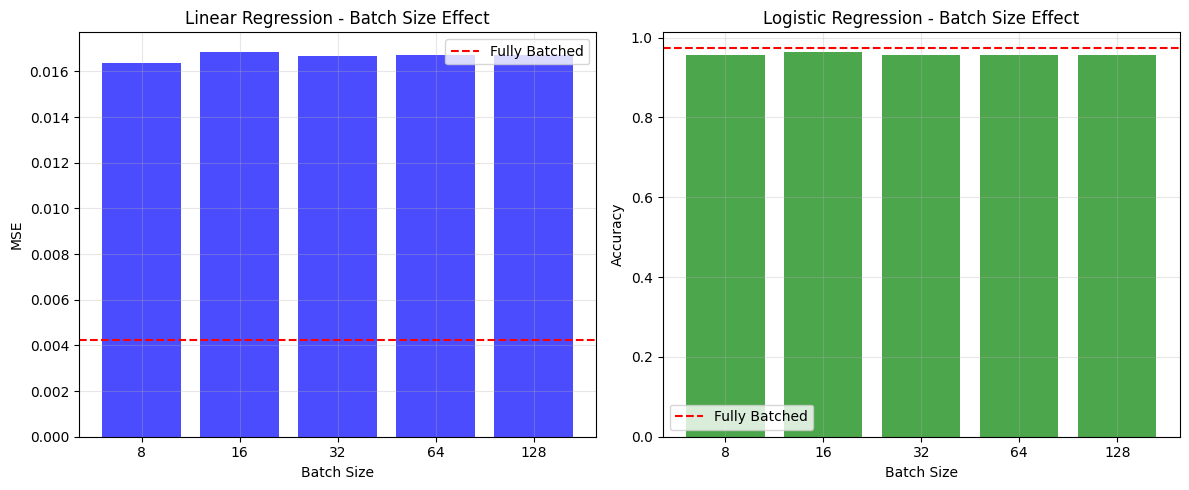

In [ ]:
# Plot batch size results

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear Regression
ax1.bar(range(len(batch_sizes)), lr_batch_results, color='blue', alpha=0.7)
ax1.axhline(y=mse_full, color='red', linestyle='--', label='Fully Batched')
ax1.set_xticks(range(len(batch_sizes)))
ax1.set_xticklabels(batch_sizes)
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('MSE')
ax1.set_title('Linear Regression - Batch Size Effect')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Logistic Regression
ax2.bar(range(len(batch_sizes)), log_batch_results, color='green', alpha=0.7)
ax2.axhline(y=acc_full, color='red', linestyle='--', label='Fully Batched')
ax2.set_xticks(range(len(batch_sizes)))
ax2.set_xticklabels(batch_sizes)
ax2.set_xlabel('Batch Size')
ax2.set_ylabel('Accuracy')
ax2.set_title('Logistic Regression - Batch Size Effect')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##Task 3.5

In [ ]:
# Learning rate analysis

learning_rates = [0.001, 0.01, 0.1]
lr_learning_results = []
log_learning_results = []

print("\nLinear Regression - Learning Rate Analysis:")
for lr in learning_rates:
    model = LinearRegressionSGD()
    model.fit_sgd(X_train_parkinsons, y_train_parkinsons, learning_rate=lr, batch_size=32)
    y_pred = model.predict(X_test_parkinsons)
    mse = mean_squared_error(y_test_parkinsons, y_pred)
    lr_learning_results.append(mse)
    print(f"  Learning rate {lr}: MSE = {mse:.4f}")

print("\nLogistic Regression - Learning Rate Analysis:")
for lr in learning_rates:
    model = LogisticRegression(learning_rate=lr)
    model.fit(X_train_cancer, y_train_cancer)
    y_pred = model.predict(X_test_cancer)
    y_pred_class = (y_pred > 0.5).astype(int)
    acc = accuracy_score(y_test_cancer, y_pred_class)
    log_learning_results.append(acc)
    print(f"  Learning rate {lr}: Accuracy = {acc:.4f}")


Linear Regression - Learning Rate Analysis:
  Learning rate 0.001: MSE = 0.0382
  Learning rate 0.01: MSE = 0.0167
  Learning rate 0.1: MSE = 0.0043

Logistic Regression - Learning Rate Analysis:
  Learning rate 0.001: Accuracy = 0.9561
  Learning rate 0.01: Accuracy = 0.9737
  Learning rate 0.1: Accuracy = 0.9737


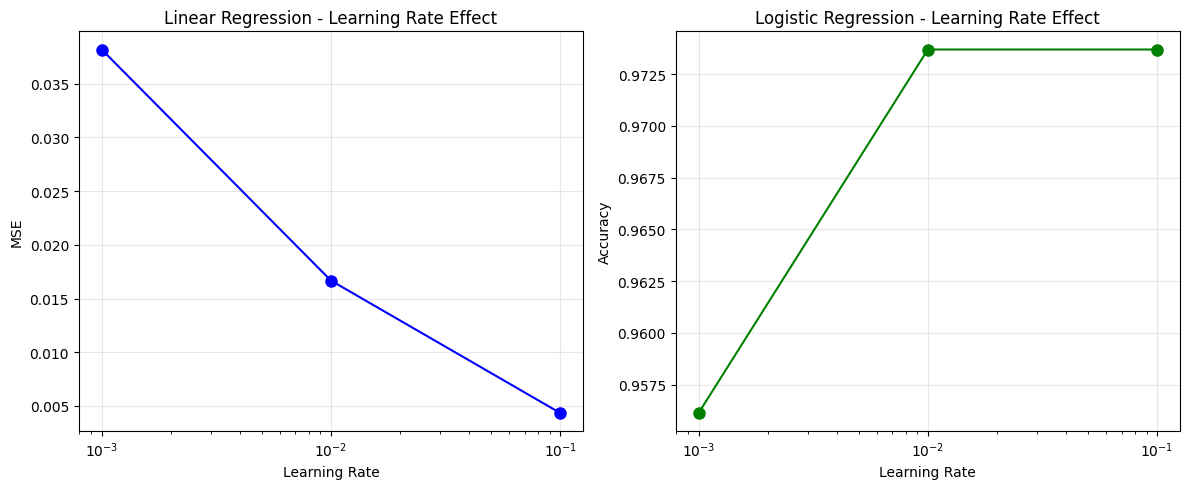

In [ ]:
# Plot learning rate results

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear Regression
ax1.semilogx(learning_rates, lr_learning_results, 'o-', color='blue', markersize=8)
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('MSE')
ax1.set_title('Linear Regression - Learning Rate Effect')
ax1.grid(True, alpha=0.3)

# Logistic Regression
ax2.semilogx(learning_rates, log_learning_results, 'o-', color='green', markersize=8)
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Accuracy')
ax2.set_title('Logistic Regression - Learning Rate Effect')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Task 3.6


In [ ]:
# Analytical vs SGD Linear regression comparison

model_analytical = LinearRegression()
model_analytical.fit(X_train_parkinsons, y_train_parkinsons)
y_pred_analytical = model_analytical.predict(X_test_parkinsons)
mse_analytical = mean_squared_error(y_test_parkinsons, y_pred_analytical)

sgd_configs = [
    {'batch_size': 32, 'lr': 0.01, 'iters': 1000},
    {'batch_size': 64, 'lr': 0.01, 'iters': 1500},
    {'batch_size': 128, 'lr': 0.005, 'iters': 2000}
]

print(f"\nAnalytical Solution: MSE = {mse_analytical:.4f}")
print("\nSGD Solutions:")

sgd_results = []
for config in sgd_configs:
    model_sgd = LinearRegressionSGD()
    model_sgd.fit_sgd(X_train_parkinsons, y_train_parkinsons,
                      learning_rate=config['lr'],
                      batch_size=config['batch_size'],
                      max_iters=config['iters'])
    y_pred_sgd = model_sgd.predict(X_test_parkinsons)
    mse_sgd = mean_squared_error(y_test_parkinsons, y_pred_sgd)
    sgd_results.append(mse_sgd)
    print(f"  Batch={config['batch_size']}, LR={config['lr']}, Iters={config['iters']}: MSE = {mse_sgd:.4f}")

# Compare weight vectors
print("\nWeight Vector Comparison (first 5 weights):")
print(f"Analytical: {model_analytical.w[:5]}")
print(f"SGD (last config): {model_sgd.w[:5]}")

# Calculate L2 norm difference
weight_diff = np.linalg.norm(model_analytical.w - model_sgd.w)
print(f"\nL2 norm of weight difference: {weight_diff:.4f}")


Analytical Solution: MSE = 0.0042

SGD Solutions:
  Batch=32, LR=0.01, Iters=1000: MSE = 0.0167
  Batch=64, LR=0.01, Iters=1500: MSE = 0.0119
  Batch=128, LR=0.005, Iters=2000: MSE = 0.0167

Weight Vector Comparison (first 5 weights):
Analytical: [ 0.06413493 -0.02915399  0.01133193  0.88013604 -0.6124951 ]
SGD (last config): [ 0.12393905 -0.0306499   0.04641311  0.39444384  0.00606823]

L2 norm of weight difference: 26.3155


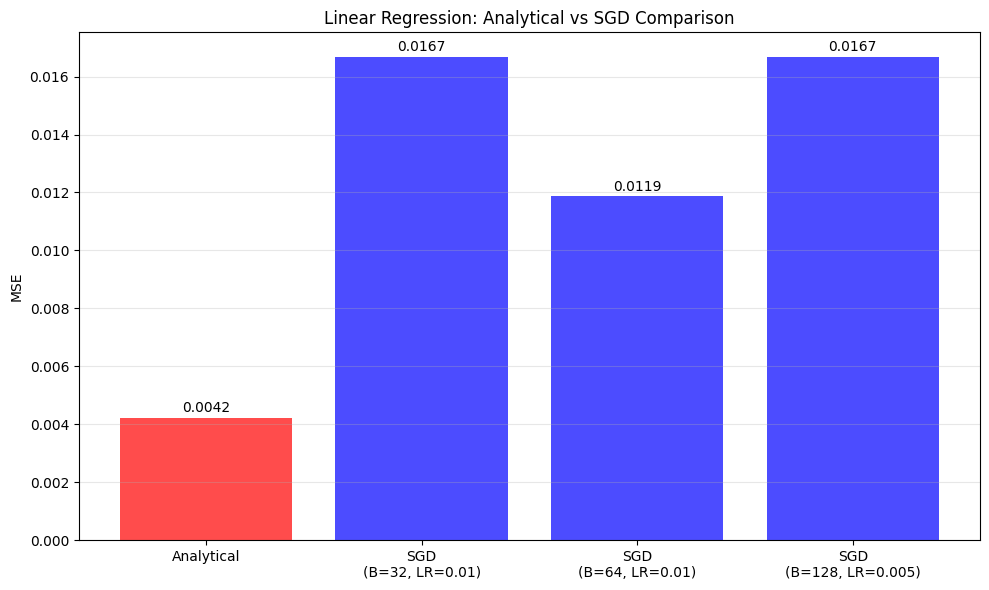

In [ ]:
# Visualization

labels = ['Analytical'] + [f'SGD\n(B={c["batch_size"]}, LR={c["lr"]})' for c in sgd_configs]
mse_values = [mse_analytical] + sgd_results

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, mse_values, color=['red'] + ['blue']*3, alpha=0.7)
plt.ylabel('MSE')
plt.title('Linear Regression: Analytical vs SGD Comparison')
plt.grid(True, alpha=0.3, axis='y')

# value labels on bars
for bar, val in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001,
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



## Aditional experiments

In [ ]:
# Try adaptive learning rates and more iterations to fix SGD convergence issue
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
iterations = [500, 1000, 2000, 5000, 10000]

best_mse = float('inf')
for lr in learning_rates:
    for n_iter in iterations:
        model = LinearRegressionSGD()
        model.fit_sgd(X_train_parkinsons, y_train_parkinsons,
                     learning_rate=lr, max_iters=n_iter, batch_size=32)
        y_pred = model.predict(X_test_parkinsons)
        mse = mean_squared_error(y_test_parkinsons, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_config = {'lr': lr, 'iters': n_iter}
print(f"Best SGD config: {best_config}, MSE: {best_mse:.4f}")

Best SGD config: {'lr': 0.5, 'iters': 5000}, MSE: 0.0042


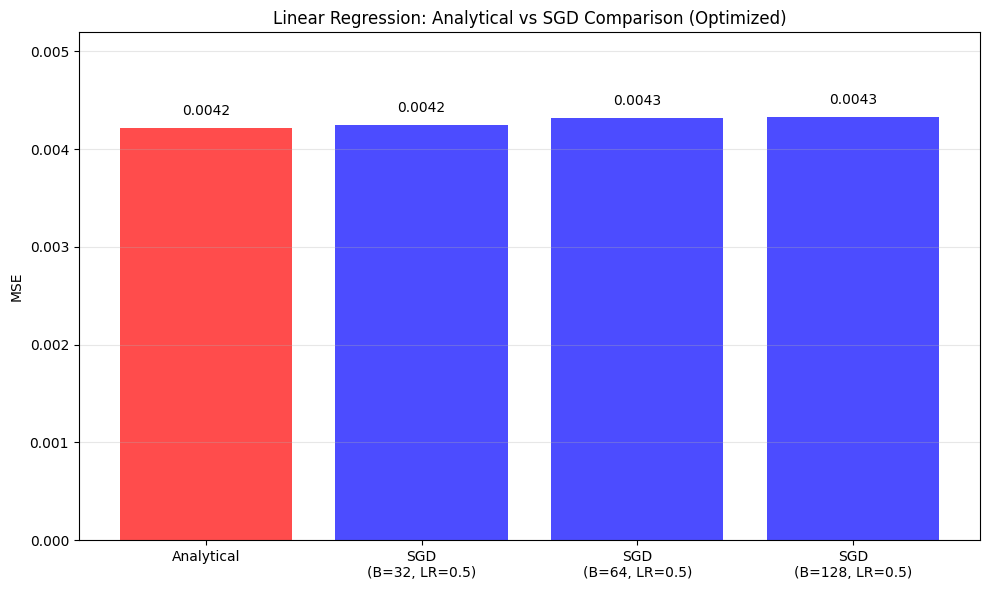

Analytical: MSE = 0.0042
SGD Optimized (B=32, LR=0.5, Iters=5000): MSE = 0.0042


In [ ]:
# Create comparison plot with optimized SGD parameters
plt.figure(figsize=(10, 6))

# Analytical solution (already computed)
model_analytical = LinearRegression()
model_analytical.fit(X_train_parkinsons, y_train_parkinsons)
y_pred_analytical = model_analytical.predict(X_test_parkinsons)
mse_analytical = mean_squared_error(y_test_parkinsons, y_pred_analytical)

# SGD with optimized parameters (lr=0.5, iters=5000)
model_sgd_optimized = LinearRegressionSGD()
model_sgd_optimized.fit_sgd(X_train_parkinsons, y_train_parkinsons,
                            learning_rate=0.5, max_iters=5000, batch_size=32)
y_pred_sgd_opt = model_sgd_optimized.predict(X_test_parkinsons)
mse_sgd_opt = mean_squared_error(y_test_parkinsons, y_pred_sgd_opt)

sgd_configs = [
    {'batch_size': 64, 'lr': 0.5, 'iters': 5000},
    {'batch_size': 128, 'lr': 0.5, 'iters': 5000}
]

mse_results = [mse_analytical]  # Start with analytical
labels = ['Analytical']

# Add optimized SGD
mse_results.append(mse_sgd_opt)
labels.append('SGD\n(B=32, LR=0.5)')

# Add other configurations
for config in sgd_configs:
    model = LinearRegressionSGD()
    model.fit_sgd(X_train_parkinsons, y_train_parkinsons,
                  learning_rate=config['lr'],
                  batch_size=config['batch_size'],
                  max_iters=config['iters'])
    y_pred = model.predict(X_test_parkinsons)
    mse = mean_squared_error(y_test_parkinsons, y_pred)
    mse_results.append(mse)
    labels.append(f"SGD\n(B={config['batch_size']}, LR={config['lr']})")

# Create bar plot
colors = ['red'] + ['blue'] * (len(mse_results) - 1)
bars = plt.bar(labels, mse_results, color=colors, alpha=0.7)

for bar, val in zip(bars, mse_results):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001,
             f'{val:.4f}', ha='center', va='bottom', fontsize=10)

plt.ylabel('MSE')
plt.title('Linear Regression: Analytical vs SGD Comparison (Optimized)')
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, max(mse_results) * 1.2)
plt.tight_layout()
plt.show()

print(f"Analytical: MSE = {mse_analytical:.4f}")
print(f"SGD Optimized (B=32, LR=0.5, Iters=5000): MSE = {mse_sgd_opt:.4f}")